In [538]:
import os
import re
import statistics
import pandas as pd

In [539]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [540]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))

In [541]:
df.shape

(855344, 63)

In [542]:
df.sample(10)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk198105820,951028s1980 xr ||| | cze,None,None,None,None,None,None,None,None,None,[621.39.05(075.8)(076.5)],[aut],[xx0048065],"[Fara, Petr]",None,None,[Měření v telekomunikační technice :],[Petr Fara],None,None,None,[1. vyd.],None,[Praha :],"[ČVUT,]",[1980],None,None,None,None,None,None,None,[91 s. :],"[il., tab. ;]",[4°],None,None,[150 výt.],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Technika telekomunikační - měření - cvičení - učebnice vysokošk.],nam a22 1 4500
bk196101443,980309s1960 xr ||| | cze,None,None,None,None,None,None,None,None,None,[576.8.093(075.8)(076.5)],[aut],[jk01050869],"[Jandásek, Ladislav,]",[1917-1984],None,[Lékařská mikrobiologie.],[Ladislav Jandásek],"[5. [díl],]",[Praktikum /],[Praktikum],"[2., přeprac. vyd.]",None,[Praha :],"[SPN,]",[1960],None,[(KNT 6)],None,None,None,None,None,[76 s. :],[[2] tb. ;],[4°],[Učební texty vysokých škol],None,[460 výt.],None,None,[Určeno pro posluchače lékařské fakulty v Brně],None,None,None,None,None,None,None,None,None,None,None,None,None,None,[kn20010709352],[Univerzita J.E. Purkyně v Brně],None,[Učební texty vysokých škol (SPN)],None,[Mikrobiologie lékařská - praktika - učebnice vysokoškol.],nam a22 1 4500
bk197802177,970323s1977 xr e 00| 0 cze,None,"[Kčs 34,50]",[(Váz.) :],[cze],None,[0],None,[334],[Formy organizace a spolupráce v ekonomice],"[334.73, 63, 631.115.8, 631.145, 349.42, (437), (048.8)]",[aut],[jk01100663],"[Pospíšil, Boleslav,]",[1927-1981],None,[Právně teoretické problémy československého zemědělského družstevnictví /],[Boleslav Pospíšil],None,None,None,[1. vyd.],None,[Brno :],"[Univerzita J.E. Purkyně,]",[1977 [i.e. 1978]],None,[(Tisk 1)],None,None,None,None,None,[285 s. ;],None,[8°],[Acta Universitatis Brunensis. Iuridica ;],[no. 24],"[V tiráži vročení 1978, Obálka a vazba František Herman, 800 výt., Pozn.]","[Práce se zaměřuje zejména na družstevní socialistické vlastnictví a na družstevní formy spolupráce v zemědělství a agrokomplexu. Všímá si také hlavních rysů vzniku družstva, členství v JZD, družs...",None,None,[Německé a ruské resumé],None,"[družstevnictví, zemědělství, zemědělská družstva, zemědělsko-potravinářské komplexy, zemědělské právo]","[None, právní aspekty, None, None, None]",None,"[Československo, None, None, None, None]",[Československo],None,[studie],None,None,None,None,None,None,None,None,[Acta Universitatis Brunensis Iuridica],None,None,nam a22 1 4500
bk193302158,990830s1933 xr a 000 | cze,None,None,[(Brož.)],None,None,None,None,None,None,None,[aut],[jk01071608],"[Lašek, František,]",[1872-1947],None,[Ze staré slávy Litomyšle /],[Frant. Lašek],None,None,None,None,None,[V Litomyšli :],"[Časopis Od Trstenické stezky,]",[1933],None,[(V. Augusta)],None,None,None,None,None,[32 s. :],[fot. ;],[23 cm],None,None,"[S 15 obrazy Jos. Laškové, Zvláštní otisk z vlastivědného sborníku ""Od Trstenické stezky""]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500
nkc20122371212,120423s2012 xr ach e f 010 0 cze d,[978-80-86930-37-4],None,[(brož.)],None,None,None,None,[656.6/.7],[Vodní a letecká doprava],"[656.6, 061.2, (437.315), (036), (082.2)]",None,None,None,None,None,[Dvacet let Spolku přátel plavby :],[[sborník sestavili Miroslav Hubert ... et al.]],None,None,[20 let Spolku přátel plavby],None,None,[Praha :],"[Mare-Czech pro Spolek přátel plavby,]",[2012],None,None,None,None,None,None,None,[55 s. :],"[il., portréty, faksim. ;]",[21 cm],None,None,None,No

In [543]:
df = df.explode('245_a')

In [544]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'q', 'c','u', 'r']:
        if ('x' not in nn8[7:11]) and ('u' not in nn8[7:11]):
            return int(nn8[7:11])
        else:
            return None
#    if nn8[6] == 'r':
#        if ('x' not in nn8[11:15]) and ('u' not in nn8[11:15]):
#            return int(nn8[11:15])        
    else:
        print(nn8)
        return None
#    retezec = str(c260) + " " + str(c264)
#    if 'i.e.' in retezec:
#        retezec = retezec.split('i.e.')[-1]
#    if ('vročení' in str(a500).lower()) and ('správn' in str(a500).lower()):
#        retezec = str(a500).split("správn")[-1]
#    try:
#        vysledek = re.findall(r'\d{4}', retezec)
#        mozne_roky = [int(v) for v in vysledek]
#    except:
#        pass
#    if len(mozne_roky) > 0:
#        return int(statistics.median(mozne_roky))
#    else:
#        return None

In [545]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

<Axes: xlabel='rok'>

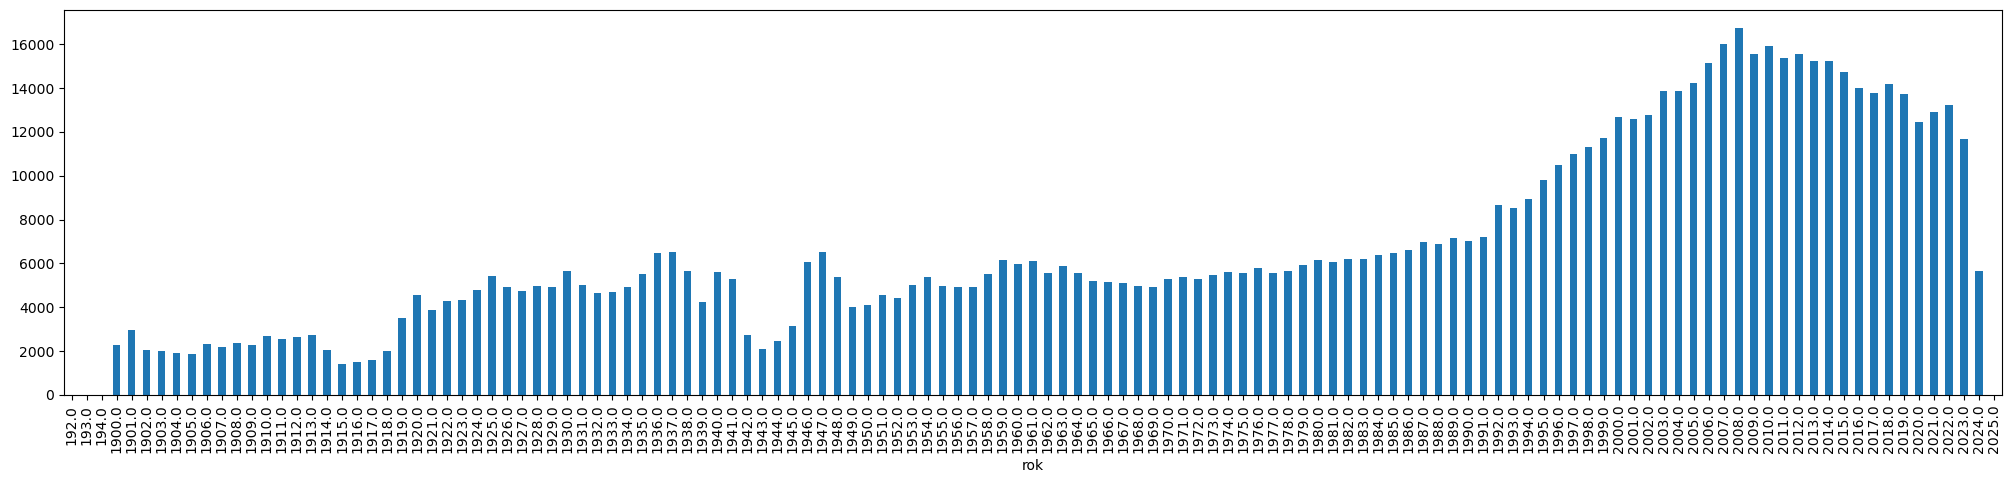

In [546]:
df.groupby("rok").size().plot.bar(figsize=(25,5))

In [547]:
df['titul'] = df['245_a'].apply(lambda x: x[:-2])
df['slov_v_nazvu'] = df['titul'].apply(lambda x: len(x.split(' ')))

In [548]:
def pocet_stran(rozsah):
    rozsah = str(rozsah)
    cisla = [int(x) for x in re.findall(r"\d{1,5}", rozsah)]
    if len(cisla) > 0:
        return max(cisla)
    else:
        return None

In [549]:
df['stran'] = df['300_a'].apply(lambda x: pocet_stran(x))

In [550]:
def zjisti_cenu(c020):
    c020 = str(c020)
    cena = None
    if 'K' in c020:
        ceny = re.findall(r'\d{1,5},{0,1}\d{0,2}',c020)
        if len(ceny) > 0:
            ceny = [float(c.replace(',','.')) for c in ceny]
            cena = min(ceny)
    if 'hal' in c020:
        ceny = re.findall(r'\d{1,5},{0,1}\d{0,2}',c020)
        if len(ceny) > 0:
            ceny = [float(c.replace(',','.')) for c in ceny]
            cena = max(ceny)
            if cena > 1:
                cena = cena / 100
    return cena

In [551]:
df['cena'] = df['020_c'].apply(lambda x: zjisti_cenu(x))

In [552]:
def vydani(o_vydani):
    vsechny_udaje = []
    slova = {'první':1,'prvé':1,'druhé':2,'třetí':3,'čtvrté': 4, 'páté': 5, 'šesté': 6, 'sedmé': 7, 'osmé': 8, 'deváté': 9, 'desáté': 10, 'jedenácté': 11, 'dvanácté': 12, 'třinácté': 13, 'čtrnácté': 14, 'patnácté': 15, 'šestnácté': 16, 'sedmnácté': 17, 'osmnácté': 18, 'devatenácté': 19, 'dvacáté': 20, 'třicáté': 30}
    rimske = {'i.': 1, 'ii.' : 2, 'iii.': 3, 'iv.': 4, 'v.': 5, 'vi.': 6, 'vii.': 7, 'viii.': 8, 'ix.': 9}
    o_vydani = str(o_vydani).lower().replace('IQ 147','').replace('68 Publishers','').replace('65. poli','').split('zákon')[0].split('narozen')[0]
    o_vydani = re.sub(r'\d{1,5}\s{0,2}(obr|výt|let)','',o_vydani)
    cifry = re.findall(r'\d{1,6}',o_vydani)
    if cifry:
        cifry = [int(c) for c in cifry if int(c) < 1000]
        vsechny_udaje += cifry
    for slovo, cislo in slova.items():
        if slovo in o_vydani:
            vsechny_udaje.append(cislo)
    for pismena, cislo in rimske.items():
        if pismena in o_vydani:
            vsechny_udaje.append(cislo)
    if len(vsechny_udaje) > 0:
        return max(vsechny_udaje)
    else:
        return None

In [553]:
df['vydani'] = df['250_a'].apply(lambda x: vydani(x))

In [554]:
def vazba(q020):
    q020 = str(q020).lower()
    if "brož" in q020:
        if ("váz" in q020) or ("pevn" in q020):
            return "oboje"
        else:
            return "brožovaná"
    elif ("váz" in q020) or ("pevn" in q020):
        return "pevná"
    else:
        return None

In [555]:
df['vazba'] = df['020_q'].apply(lambda x: vazba(x)).astype("category")

In [556]:
df.groupby('vazba').size()

C:\Users\micha\AppData\Local\Temp\ipykernel_12116\1405163450.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('vazba').size()


vazba
brožovaná    387427
oboje           918
pevná        192734
dtype: int64

In [557]:
df['zmeneno'] = df['008'].apply(lambda x: x[0:6])

In [558]:
df[(df['zmeneno'] < '241000') & (df['rok'] < 2023)][['titul','100_a','zmeneno','rok']].sort_values(by='zmeneno',ascending=False).head(100)

,titul,100_a,zmeneno,rok
001,,,,
nkc20243631873,Tajnosti Londýna,"[Féval, Paul,]",240916,1926.0
nkc20243631917,Tajnosti Londýna,"[Féval, Paul,]",240916,1972.0
cpk20243631957,Dětské soudy v Americe,"[Lederer, Max,]",240916,1911.0
cpk20243631999,Jednoduché účetnictví pro zemědělce,None,240916,1921.0
cpk20243632009,Demografie,None,240916,1969.0
cpk20243631504,Názory starých Egypťanů o duši,"[Matiegková, Ludmila,]",240912,1916.0
cpk20243631540,Kompensátor k měření střídavých napětí v širokém pásmu kmitočtů,"[Hlavsa, Vladimír,]",240912,1948.0
cpk20243631608,Modrý květ,"[Wenig, Adolf,]",240912,1938.0
cpk20243631432,Böhmisch nebo Tschechisch?,"[Kraus, Arnošt Vilém,]",240911,1916.0


In [559]:
df[df['490_a'].astype(str).str.contains('Kapka',na=False)][['rok','titul','100_a']]

,rok,titul,100_a
001,,,
bk195701965,1957.0,Volání divočiny,"[London, Jack,]"
bk195702098,1957.0,Neviditelný,"[Wells, H. G.]"
bk195704419,1957.0,"Deset dnů, které otřásly světem","[Reed, John,]"
bk195704815,1957.0,Paní Bovaryová,"[Flaubert, Gustave,]"
bk195705016,1957.0,Povídky,"[Rais, Karel Václav,]"
bk195800211,1957.0,Tichý Američan,"[Greene, Graham,]"
bk195800940,1958.0,Nepřirozená zvířata,"[Vercors,]"
bk195801383,1958.0,Devadesát tři,"[Hugo, Victor,]"
bk195802356,1958.0,Anna Vickersová,"[Lewis, Sinclair,]"


In [560]:
df[df['titul'].str.lower().str.contains('každému chléb',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk196301946,971230s1962 xr e 000 | cze,None,None,None,None,None,None,None,[316.3],[Globální společnosti. Sociální struktura. Sociální skupiny],"[316.323.72, 316.3, 316.728, 342.5, (049)]",[aut],[jk01110728],"[Selucký, Radoslav,]",[1930-1991],None,"Každému chléb, každému růže :",[Radoslav Selucký],None,None,None,[1. vyd.],None,[Praha :],"[Mladá fronta,]",[1962],None,[(Mír 22)],None,None,None,None,None,"[208, [4] s. :]",[il. ;],[8°],[Dobrý vítr ;],[sv. 21],"[Obálka Miloslav Fulín, 14000 výt., S fot. na tit. dvojlistě]","[Populární, zasvěcené a přitom živě psané stati probírají nejrůznější témata, jež odůvodněně předvídají věk komunismu: jeho výrobní, mravní a kulturní úroveň, význam vědy a techniky, automatizaci,...",None,None,None,None,"[komunismus, společnost, každodenní život, politický systém]",None,None,None,None,None,[pojednání],None,None,None,None,None,None,None,None,[Dobrý vítr],None,"[Komunismus - výklady populární, Společnost komunistická - výklady populární]",nam a22 1 4500,1962.0,"Každému chléb, každému růže",4,208.0,NaN,1.0,NaN,971230


In [561]:
df[df['072_x'].astype(str).str.lower().str.contains('futur',na=False)][['rok','titul','100_a']].sort_values(by="rok")

,rok,titul,100_a
001,,,


In [562]:
df[df['072_x'].astype(str).str.lower().str.contains('algor',na=False)][['rok','titul','100_a']].sort_values(by="rok").head(50)

,rok,titul,100_a
001,,,


In [563]:
df[df['650_a'].astype(str).str.contains('grafy',na=False)][['rok','titul','100_a','650_a']].sort_values(by='rok')

,rok,titul,100_a,650_a
001,,,,
cpk19970187957,1922.0,Illustrační příloha ku knize Učebnice grafologie,"[Poppée, Dolfina,]","[grafologie, autografy]"
cpk19970186872,1925.0,Vědecká grafologie,"[Saudek, Robert,]","[autografy, grafologie, charakter, typologie osobnosti]"
bk193703459,1937.0,Petr Bezruč a čeští bibliofilové,None,"[česká poezie, autografy, bibliofilství, bibliofilské tisky]"
cpk20132468935,1939.0,Poznámky Boženy Němco,"[Němcová, Božena,]","[české spisovatelky, literární pozůstalost, autografy]"
bk195200108,1952.0,Nomografie a grafický počet v technické praksi,"[Pleskot, Václav,]","[nomografie, grafy funkcí]"
bk195403304,1954.0,Nomografie a grafický počet v technické praxi,"[Pleskot, Václav,]","[nomografie, grafy funkcí]"
bk195602250,1955.0,Grafická kontrola ve spojíc,"[Svoboda, Emanuel,]","[spoje (komunikace), organizace práce, grafy a schémata]"
bk195602251,1955.0,Grafická kontrola ve spojíc,"[Svoboda, Emanuel,]","[spoje (komunikace), organizace práce, grafy a schémata]"
bk195602766,1956.0,Nomografie a grafický počet v technické praxi,"[Pleskot, Václav,]","[nomografie, grafy funkcí]"


In [564]:
df[df['650_a'].astype(str).str.contains('matematické hry',na=False)][['rok','titul','100_a','650_a']].sort_values(by='rok')

,rok,titul,100_a,650_a
001,,,,
bk195202265,1952.0,Zajímavá matematika,"[Perel'man, Jakov Isidorovič,]","[matematika, matematické hry, hádanky, hlavolamy]"
bk195902177,1959.0,Přednášky Československé společnosti pro šíření politických a vědeckých znalostí,None,"[matematika, matematické hry]"
bk196102451,1961.0,Zajímavá matematika,"[Perel'man, Jakov Isidorovič,]","[matematika, matematické hry, hádanky, hlavolamy]"
bknzdr18988,1963.0,Matematické hry a zábavy,None,[matematické hry]
bk197000074,1969.0,Nebojte se matematiky,"[Sedláček, Jiří,]","[matematika, matematické hry]"
bk197200243,1971.0,Zajímavá matematika,"[Perel'man, Jakov Isidorovič,]","[matematika, matematické hry, hádanky, hlavolamy]"
bk197301706,1973.0,Hra s nekonečnem,"[Péter, Rózsa,]","[matematika, matematické hry, matematické myšlení]"
bk197501555,1975.0,Zábavná matematika,"[Novoveský, Štefan,]","[matematika, matematika, matematika, matematické hry]"
bk197800890,1978.0,Zábavná matematika,"[Novoveský, Štefan,]","[matematika, matematika, matematika, matematické hry]"


In [565]:
df[df['650_a'].astype(str).str.contains('algoritm',na=False)][['rok','titul','100_a','650_a']].sort_values(by='rok')

,rok,titul,100_a,650_a
001,,,,
cpk20000962129,1968.0,Algoritmizace úloh,"[Grégrová, Milona]","[algoritmizace, programování]"
bk197800477,1977.0,Tvorba algoritmu ASŘ [automatizované systémy řízení],"[Sedlák, Jan,]","[automatizované systémy řízení, algoritmy]"
bk198102380,1978.0,Pravidla pro racionalizaci tvorby algoritmů typového ASŘP,None,"[automatizované systémy řízení, algoritmy, průmysl]"
bk19820807d,1982.0,Algoritmizace a programování výpočtů v mechanizace využitím maticové algebry,"[Okrouhlík, Miloslav,]","[algoritmizace, programování]"
ck8301178,1983.0,Seminář a cvičení z matematiky,None,"[matematika, teorie pravděpodobnosti, algoritmy]"
ck8306263,1983.0,Algoritmizace a programování,"[Raichl, Jiří,]","[programování, algoritmizace]"
ck8401457,1983.0,Analýza algoritmů,"[Reiterman, Jan,]",[algoritmy]
cpk19980161389,1984.0,Teorie algoritmů II,"[Demuth, Osvald,]",[algoritmy]
ck8604047,1985.0,Elektronické hry,"[Paskalev, Živko Borisov]","[matematické hry, algoritmy, elektronické obvody]"


In [566]:
df[df['650_a'].astype(str).str.contains('programov',na=False)][['rok','titul','100_a','650_a']].sort_values(by='rok').head(60)

,rok,titul,100_a,650_a
001,,,,
bk196005366,1960.0,Lineární programování,"[Habr, Jaroslav,]","[lineární programování, ekonomie]"
bk196100251,1960.0,O jednom minimálním problému v teorii lineárního plánování,"[Nožička, František,]","[lineární programování, doprava, optimalizace]"
bk196300102,1962.0,Úvod do programování pro samočinné počítače,"[Raichl, Jiří,]","[programování, počítače]"
bk196302758,1962.0,Programově řízené obráběcí stroje,"[Preisler, Jiří]","[obráběcí stroje, programování]"
bk196301737,1963.0,Základy programování na samočinném počítači Ural 1,"[Pleskot, Václav,]","[programování, počítače]"
bk196302688,1963.0,Bibliografie k otázkám operačního výzkumu,"[Rauscherová, Marie,]",[lineární programování]
bk196305432,1963.0,Použití metod lineárního programování ve stavebnict,None,"[lineární programování, stavebnictví]"
bk196400377,1963.0,Sbírka příkladů z lineárního programování,"[Rychetník, Luděk,]",[lineární programování]
bk196401196,1964.0,Základy programování pro samočinný počítač Ural 1,"[Pleskot, Václav,]","[programování, počítače]"


In [567]:
df[df['650_a'].astype(str).str.contains('futurologie',na=False)][['rok','titul','100_a']].sort_values(by='rok')

,rok,titul,100_a
001,,,
bk196600149,1965.0,Ráj nebo zničení lidstva?,"[Baade, Fritz,]"
bk196703603,1967.0,Dějiny budoucnosti,"[Rousseau, Pierre,]"
bk197003179,1969.0,Futurologický slovníček,"[Šulc, Ota]"
bk197104347,1971.0,K futurologickým problémům hromadného sdělová,None
bk197401104,1973.0,Základy techniky a ekonomiky pro II. ročník gymnasií s experimentální výukou základům techniky a ekonomik,"[Kunc, Antonín,]"
bknzdr16173,1979.0,Základy techniky a ekonomiky pro II. ročník gymnasií s experimentální výukou základům techniky a ekonomik,"[Kunc, Antonín,]"
np9544333,1995.0,Summa technologiae,"[Lem, Stanisław,]"
cpk19960146703,1996.0,Fantastická budoucnost,"[Holbe, Rainer,]"
cpk20010981497,1997.0,"Sborník příspěvků ze 4. mezinárodního kolokvia ""Koncipování budoucnosti v Evropě '97""",None


In [568]:
df[df['titul'] == 'Futurologie']

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk196901604,970702s1968 xr **** *** cze,None,None,None,None,None,None,None,None,None,"[016:008""313""]",[edt],[jk01131681],"[Šulc, Ota]",None,None,Futurologie :,[Zprac. Ota Šulc a spoluprac.],None,None,None,None,None,[Praha :],"[St. knihovna ČSSR-Ústř. ekon. knihovna,]",[[1968]],None,None,None,None,None,None,None,"[3, 33, [1] s. ;]",None,[8°],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Futurologie - bibliografie, Futurologie - brožury informační]",nam a22 1 4500,1968.0,Futurologie,1,33.0,NaN,NaN,NaN,970702
nkc20213330231,210622s2021 xr acf e 000 0 cze d,[978-80-7376-618-4],None,[(vázáno)],None,None,None,None,[00],[Věda. Všeobecnosti. Základy vědy a kultury. Vědecká práce],"[008.2, 001.18, 005.521, (081)]",[aut],[jk01152493],"[Zeman, Miloš,]",[1944-],None,Futurologie :,[Miloš Zeman],None,None,[Futurologie 1968],[Vydání první],None,None,None,None,None,None,None,[Velké Přílepy :],"[Olympia,]",[2021],[1],"[223 stran, 16 nečíslovaných stran obrazových příloh :]","[ilustrace, portréty ;]",[22 cm],None,None,None,None,None,None,None,None,"[futurologie, prognostika, prognózování, futurology, prognostics, forecasting]",None,None,None,None,None,"[sborníky, papers by one author]",None,None,None,None,None,None,None,None,None,None,None,cam a22 i 4500,2021.0,Futurologie,1,223.0,NaN,1.0,pevná,210622


In [569]:
df[df['titul'].astype(str).str.lower().str.contains('futurolog',na=False)][['rok','titul','100_a']].sort_values(by="rok").head(50)

,rok,titul,100_a
001,,,
bk196901604,1968.0,Futurologie,"[Šulc, Ota]"
bk196903652,1969.0,Výběr excerpcí k futurologickým studiím,None
bk197003179,1969.0,Futurologický slovníček,"[Šulc, Ota]"
bk197104347,1971.0,K futurologickým problémům hromadného sdělová,None
bk197703520,1977.0,Futurologický kongres,"[Lem, Stanisław,]"
nkc20071717015,2007.0,Futurologie v tvorbě architektonického prostoru,"[Blažek, Petr,]"
nkc20071722805,2007.0,Bezpečnostní futurologie,"[Laucký, Vladimír,]"
nkc20091967355,2009.0,Futurologická studia,"[Petrášek, František,]"
nkc20213330231,2021.0,Futurologie,"[Zeman, Miloš,]"


In [570]:
df[df['100_a'].astype(str).str.contains(r'Breuer.*Miloslav',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [571]:
df[df['rok'] > 1850].sort_values(by='rok').head(20)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bkneli03732,020320q19001950xr e f 000 0 cze,None,None,None,None,None,None,None,[27-5],[Liturgie. Křesťanské umění a symbolika. Duchovní život],"[272-534.35, 27-584, 272-584.7, (035)]",None,None,None,None,None,"Katolická missionární knížka, čili výborné duchovní cvičení v pravém křesťanském obcování :",None,None,None,None,None,None,[Vimperk :],"[J. Steinbrener,]",[[19--]],None,None,None,None,None,None,None,[256 s. :],[obr. ;],[12°],None,None,[Frontispice],None,None,None,None,None,"[duchovní život, katolické exercicie, katolické modlitby]",None,None,None,None,None,[příručky],None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1900.0,"Katolická missionární knížka, čili výborné duchovní cvičení v pravém křesťanském obcování",11,256.0,NaN,NaN,NaN,020320
bknjje07215,021215s1900 xr e 000 cze,None,None,[(Brož.)],None,None,None,None,[792],[Divadlo. Divadelní představení],"[792.05-027.542, 792.2/.8, 792.075, (437.311), (048.8)]",[aut],None,[Modestus],None,None,Včerejšek a zítřek Národního divadla /,[do kroniky českého umění dramatického zaznamenává Modestus],None,None,None,None,None,[V Praze :],"[Tiskem a nákladem Aloisa Wiesnera,]",[1900],None,None,None,None,None,None,None,[35 s. ;],None,[19 cm],None,None,None,None,None,None,None,[19. století],"[národní divadla, divadelní představení, divadelní management]",None,"[19. století, 19. století, None]","[Česko, Česko, None]",[Praha (Česko)],None,[přehledy],None,None,None,None,None,None,None,None,None,[Alois Wiesner],None,nam a22 a 4500,1900.0,Včerejšek a zítřek Národního divadla,5,35.0,NaN,NaN,brožovaná,021215
bkn20020530565,060213s1900 xr e 000 1acze,None,None,[(Váz.)],None,None,None,None,[929],[Biografie],"[929, 821.162.3-051, (0:82-94)]",[aut],[jk01021137],"[Čech, Svatopluk,]",[1846-1908],None,Vzpomínky z cest a života.,[napsal Svatopluk Čech],[[Díl] I /],None,None,None,None,[Praha :],"[F. Topič,]",[1900],None,[(Unie)],None,None,None,None,None,[291 s. ;],None,[18 cm],[Sebrané spisy Svatopluka Čecha ;],[díl 5.],None,None,None,None,None,[19. století],[čeští spisovatelé],None,[19. století],None,None,None,[autobiografické vzpomínky],None,None,None,None,None,None,None,None,None,None,None,nam a22 4500,1900.0,Vzpomínky z cest a život,5,291.0,NaN,NaN,pevná,060213
cpk20233576705,231201s1900 xr 000 | cze,None,None,[(Brožováno)],None,None,None,None,None,None,None,[aut],[jk01072875],"[Mach, Adolf,]",[1857-1918],None,Sbírka příkladů geometrických pro vyšší třídy středních škol :,[sestavil Adolf Mach],None,None,None,None,None,None,None,None,None,None,None,"[Jičín :, Praha :, None]","[nákladem vlastním,, Tiskem knihtiskárny Bedřicha Outraty]","[1900, None]","[1, 3]",[188 stran ;],None,[23 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Adolf Mach],None,nam a22 i 4500,1900.0,Sbírka příkladů geometrických pro vyšší třídy středních škol,8,188.0,NaN,NaN,brožovaná,231201
nos190243117,000806m19001901xr cze,None,None,None,None,None,None,None,None,None,None,[aut],[jk01111186],"[Schuster, Václav,]",[1871-1944],None,K otázce výchovy živnostenského dorostu /,[JUDr. Václav Schuster],None,None,None,None,None,[[S.l. :],"[s.n.],]",[1900-1901],None,None,None,None,None,None,None,[5 s. ;],None,[v. 8°],[Zpr. odbor. školy pokrač. pro klenotníky ;],[1900/1],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Zpr. odbor. školy pokrač. pro klenotníky],None,None,nam a22 1 4

In [725]:
df['001_pismena'] = df.apply(lambda row: re.search('\w{1,*}', row['001']).group(), axis=1)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\micha\AppData\Local\Temp\ipykernel_12116\867778550.py:1: SyntaxWarning: invalid escape sequence '\w'
  df['001_pismena'] = df.apply(lambda row: re.search('\w{1,*}', row['001']).group(), axis=1)
C:\Users\micha\AppData\Local\Temp\ipykernel_12116\867778550.py:1: SyntaxWarning: invalid escape sequence '\w'
  df['001_pismena'] = df.apply(lambda row: re.search('\w{1,*}', row['001']).group(), axis=1)


KeyError: '001'

In [ ]:
df.groupby('001_pismena').size()

In [572]:
def dilo(autorstvo):
    prac1 = df[df['100_a'].astype(str).str.contains(autorstvo,na=False)][['titul','rok','vydani','100_a','100_4','700_a','700_4']]
    prac2 = df[df['700_a'].astype(str).str.contains(autorstvo,na=False)][['titul','rok','vydani','100_a','100_4','700_a','700_4']].dropna(subset=['700_a','700_4']).explode(['700_a','700_4'])
    prac2 = prac2[(prac2['700_a']).str.contains(autorstvo,na=False) & (prac2['700_4'] == 'aut')]
    return pd.concat([prac1,prac2]).drop_duplicates(subset=['titul','rok']).sort_values('rok')

In [573]:
def tvurce(autorstvo, role):
    prac = df[df['700_a'].astype(str).str.contains(autorstvo,na=False)][['titul','rok','vydani','100_a','100_4','700_a','700_4']].explode(['700_a','700_4'])
    prac = prac[(prac['700_a']).str.contains(autorstvo,na=False) & (prac['700_4'] == role)]
    return prac.drop_duplicates(subset=['titul','rok']).sort_values('rok')

In [574]:
dilo('Němcová, Božena').tail(50)

,titul,rok,vydani,100_a,100_4,700_a,700_4
001,,,,,,,
nkc20071783751,Karla,2010.0,1.0,"[Němcová, Božena,]",[aut],None,None
nkc20112251177,Babička,2011.0,1.0,"[Němcová, Božena,]",[aut],"[Kašpar, Adolf,]",[ill]
nkc20112236386,Sedmero pohádek,2011.0,1.0,"[Němcová, Božena,]",[aut],None,None
nkc20112179422,Nejkrásnější pohádky a bajky,2011.0,NaN,"[Erben, Karel Jaromír,]",[aut],"Němcová, Božena,",aut
nkc20112224858,Zlatá kniha pohádek,2011.0,NaN,"[Erben, Karel Jaromír,]",[aut],"Němcová, Božena,",aut
nkc20122358476,Z pokladnice našich pohádek,2011.0,NaN,"[Němcová, Božena,]",[aut],"[Pítrová, Lucie,, Matějová, Eva]","[ill, com]"
nkc20122414905,Divá Bára a jiné dívky na útěku,2012.0,NaN,"[Němcová, Božena,]",[aut],"[Janáčková, Jaroslava,]",[aft]
nkc20122275935,Chudí lidé,2012.0,2.0,"[Němcová, Božena,]",[aut],"[Korbelová, Nela,]",[ill]
nkc20122410457,Bylo nebylo,2012.0,6.0,"[Němcová, Božena,]",[aut],"[Zmatlíková, Helena,, Peisertová, Alena]","[ill, edt]"


In [575]:
df[['008','700_a','700_4']].dropna().explode(['700_a','700_4']).groupby('700_4')['700_a'].nunique().nlargest()

700_4
aut    88440
edt    23740
trl    22552
ill    16385
com    14151
Name: 700_a, dtype: int64

In [651]:
explo700 = df[['008','rok','700_a','700_4']].dropna().explode(['700_a','700_4'])
for c in explo700.columns:
    explo700[c] = explo700[c].apply(lambda x: str(x).replace(",","").strip())

In [687]:
def spoluautorstvo(jmeno):
    prac = explo700[(explo700['700_a'].str.contains(jmeno.replace(",",""), na=False))]
    seznam = prac['008'].drop_duplicates().to_list()
    prac2 = explo700[explo700['008'].isin(seznam)]
    prac3 = prac2[~prac2['700_a'].str.contains(jmeno.replace(",",""), na=False)].groupby('700_a').size().sort_values(ascending=False)
    if len(prac3) > 0:
        return prac3
    else:
        return None

In [705]:
spoluautorstvo('Hlavenka, Jiří').head(30)

700_a
Broža Petr          3
Větvička Václav     2
Anders Uwe          1
Severa František    1
Kurtz George        1
Marmel Elaine       1
Nienhaus Franz      1
Orlová Kateřina     1
Pohunek Milan       1
Pojsl Josef         1
Robinson Simon      1
Sachse Guido        1
Scambray Joel       1
Slezák Petr         1
Krásenský David     1
Tesař Vlastimil     1
VanRyper William    1
Vančura Bohumil     1
Vondrák Vojtěch     1
Werich Jan          1
Woodcock John       1
Čevela Radek        1
Špaček Martin       1
Krátký Robert       1
Kočí Lubomír        1
Antonínová Hana     1
Dudr Jaroslav       1
Balcová Katarína    1
Becherer Franz      1
Bodoano Bridget     1
dtype: int64

In [709]:
explo700[explo700['700_a'].str.contains('Hlavenka Jiří')]

,008,rok,700_a,700_4
001,,,,
cpk19970184756,970224s1995 xr a e 001 0 cze,1995.0,Hlavenka Jiří,trl
cpk19970287016,980116s1997 xr a e 001 0 cze,1997.0,Hlavenka Jiří,aut
cpk19980390050,981016s1998 xr a e 001 0 cze,1998.0,Hlavenka Jiří,aut
cpk20010884776,000425s2000 xr a e 001 0 cze,2000.0,Hlavenka Jiří,aut
cpk20011008825,010912s2001 xr a e 001 0 cze,2001.0,Hlavenka Jiří,aut
cpk20020887477,001220s2000 xr a e 001 0 cze,2000.0,Hlavenka Jiří,aut
cpk20021124514,020913s2002 xr a e f 001 0 cze,2002.0,Hlavenka Jiří,aut
cpk20021252223,030916s2003 xr a e 001 0 cze,2003.0,Hlavenka Jiří,aut
cpk20031252226,030916s2003 xr a e 001 0 cze,2003.0,Hlavenka Jiří,aut


In [580]:
explo700.groupby('700_a')['rok'].nunique().nlargest(50)

700_a
Lada, Josef,               99
Čapek, Josef,              95
Burian, Zdeněk,            91
Aleš, Mikoláš,             88
Bouda, Cyril,              80
Němcová, Božena,           78
Trnka, Jiří,               78
Fischer, Otokar,           77
Zmatlíková, Helena,        73
Svolinský, Karel,          72
Kašpar, Adolf,             70
Erben, Karel Jaromír,      69
Hrubín, František,         69
Čapek, Karel,              68
Skoumal, Aloys,            67
Born, Adolf,               66
Novotný, Vladimír,         66
Scheiner, Artuš,           66
Zaorálek, Jaroslav,        66
Novotný, František,        65
Lhoták, Kamil,             64
Vrchlický, Jaroslav,       63
Zábrana, Jan,              63
Grimm, Wilhelm Karl,       61
Kundera, Ludvík,           61
Jindra, Miroslav,          60
Müller, Karel,             60
Novák, Jiří Zdeněk,        59
Sekora, Ondřej,            59
Černý, Věnceslav,          59
Eisner, Pavel,             58
Houbová, Věra,             58
Shakespeare, William,      58
Kond

In [581]:
for profese in explo700.groupby('700_4').size().nlargest(50).index.to_list():
    print(f"{profese}: {explo700[explo700['700_4'] == profese].groupby('700_a')['rok'].nunique().nlargest(5).index.to_list()}")

aut: ['Mrštík, Vilém,', 'Styblík, Vlastimil,', 'Němcová, Božena,', 'Werich, Jan,', 'Engels, Friedrich,']
trl: ['Zaorálek, Jaroslav,', 'Fischer, Otokar,', 'Skoumal, Aloys,', 'Zábrana, Jan,', 'Houbová, Věra,']
ill: ['Lada, Josef,', 'Burian, Zdeněk,', 'Aleš, Mikoláš,', 'Čapek, Josef,', 'Trnka, Jiří,']
edt: ['Dvořák, Jan,', 'Vrána, Jan,', 'Justl, Vladimír,', 'Novotný, Miloslav,', 'Havel, Rudolf,']
aui: ['Novotný, Vladimír,', 'Dvořák, František,', 'Kundera, Ludvík,', 'Valoch, Jiří,', 'Dufek, Antonín,']
com: ['Jursa, Jan,', 'Novotný, Miloslav,', 'Vykoukal, František Vladimír,', 'Müller, Ondřej,', 'Pešek, Jiří,']
pht: ['Doležal, Vladimír,', 'Štecha, Pavel,', 'Poláček, Jiří,', 'Thoma, Zdeněk,', 'Fyman, Vladimír,']
art: ['Fulín, Miloslav,', 'Novotný, Leo,', 'Ziegler, Zdeněk,', 'Hlavsa, Oldřich,', 'Albich, Milan,']
aft: ['Pohorský, Miloš,', 'Hilský, Martin,', 'Krejčí, Karel,', 'Novotný, Vladimír,', 'Blahynka, Milan,']
oth: ['Sonnbergová, Marta,', 'Masaryk, Tomáš Garrigue,', 'Gaudl, Karel', 'Bedn

In [606]:
explo700[explo700['700_4'] == 'ill'].groupby('700_a').size().nlargest(20)

700_a
Zmatlíková, Helena,       457
Born, Adolf,              455
Burian, Zdeněk,           446
Šplíchal, Antonín,        281
Němeček, Jaroslav,        256
Lada, Josef,              253
Trnka, Jiří,              248
Winter-Neprakta, Jiří,    233
Bouda, Cyril,             225
Popprová, Andrea          208
Svolinský, Karel,         207
Krejčová, Zdeňka,         205
Čapek, Josef,             199
Černý, Věnceslav,         199
Aleš, Mikoláš,            190
Kašpar, Adolf,            180
Plicková, Edita,          179
Disney, Walt,             177
Jakešová, Miroslava,      173
Vydrová, Markéta,         160
dtype: int64

In [582]:
dilo('Kašpárek, Michal')

,titul,rok,vydani,100_a,100_4,700_a,700_4
001,,,,,,,
nkc20182997195,Hry bez hranic,2018.0,1.0,"[Kašpárek, Michal,]",[aut],None,None
nkc20233549616,Fosilie,2023.0,1.0,"[Kašpárek, Michal,]",[aut],None,None


In [583]:
dilo("Lukášková, Markéta")

,titul,rok,vydani,100_a,100_4,700_a,700_4
001,,,,,,,
nkc20172943265,Losos v kaluži,2017.0,1.0,"[Lukášková, Markéta,]",[aut],None,None
nkc20183048967,Panda v nesnázích,2018.0,1.0,"[Lukášková, Markéta,]",[aut],None,None
nkc20193156896,InTyMně,2019.0,1.0,"[Lukášková, Markéta,]",[aut],None,None
nkc20203217525,Vlaštovka v bublině,2020.0,1.0,"[Lukášková, Markéta,]",[aut],None,None
nkc20213349846,Majonéza k snídani,2021.0,1.0,"[Lukášková, Markéta,]",[aut],None,None
nkc20223438840,Losos v kaluži,2022.0,2.0,"[Lukášková, Markéta,]",[aut],None,None
nkc20223445411,Panda v nesnázích,2022.0,2.0,"[Lukášková, Markéta,]",[aut],None,None
nkc20223456764,Co vás v dějáku nenaučili,2022.0,1.0,"[Lukášková, Markéta,]",[aut],None,None
nkc20223428708,"Povídky, které pomáhají",2022.0,1.0,"[Klevisová, Michaela,]",[aut],"Lukášková, Markéta,",aut


In [584]:
dilo('Diviš, Ivan')

,titul,rok,vydani,100_a,100_4,700_a,700_4
001,,,,,,,
bk194602256,Balada z regálu,1946.0,NaN,"[Diviš, Ivan,]",[aut],"[Bednář, Kamil,, Bláha, Václav,]","[aut, ill]"
bk194800051,První hudba bratřím,1947.0,1.0,"[Diviš, Ivan,]",[aut],None,None
bk196004145,Uzlové písmo,1960.0,1.0,"[Diviš, Ivan,]",[aut],None,None
bk196105543,Rozpleť si vlasy,1961.0,NaN,"[Diviš, Ivan,]",[aut],None,None
bk196202240,Deník molekuly,1962.0,1.0,"[Diviš, Ivan,]",[aut],None,None
bk196205075,Eliášův oheň,1962.0,1.0,"[Diviš, Ivan,]",[aut],None,None
bk196304253,Morality,1963.0,1.0,"[Diviš, Ivan,]",[aut],None,None
bk196400933,Chrlení krve,1964.0,1.0,"[Diviš, Ivan,]",[aut],None,None
bk196500739,Umbriana,1965.0,1.0,"[Diviš, Ivan,]",[aut],None,None


In [585]:
df[df['100_7'].astype(str).str.contains('rcp',na=False)][['titul','rok','100_a','100_4','700_a','700_4']]

,titul,rok,100_a,100_4,700_a,700_4
001,,,,,,


In [586]:
ceske_romany = df.explode('072_a')
ceske_romany = ceske_romany[ceske_romany['072_a'] == '821.162.3-3']
ceske_romany = ceske_romany[ceske_romany['vydani'] == 1]

In [587]:
ceske_romany.groupby('rok').size()

rok
1904.0       1
1906.0       1
1908.0       1
1911.0       1
1917.0       1
1918.0       1
1920.0       1
1922.0       1
1923.0       1
1924.0       2
1925.0       1
1926.0       2
1927.0       2
1928.0       1
1929.0       2
1930.0       6
1931.0       1
1932.0       2
1933.0       1
1934.0       3
1935.0       2
1936.0       3
1938.0       2
1939.0       1
1940.0       2
1941.0       2
1942.0      13
1943.0      33
1944.0      46
1945.0      24
1946.0      34
1947.0      38
1948.0      17
1949.0      11
1950.0      18
1951.0      30
1952.0      19
1953.0      18
1954.0      28
1955.0      48
1956.0     101
1957.0      89
1958.0      37
1959.0      46
1960.0      62
1961.0      29
1962.0      42
1963.0      38
1964.0      38
1965.0      33
1966.0      45
1967.0      44
1968.0      42
1969.0      49
1970.0      39
1971.0      32
1972.0      37
1973.0      33
1974.0      43
1975.0      43
1976.0      34
1977.0      29
1978.0      39
1979.0      39
1980.0      29
1981.0      39
1982.0

In [717]:
cr1 = ceske_romany[ceske_romany['vydani'] == 1]

<Axes: xlabel='rok'>

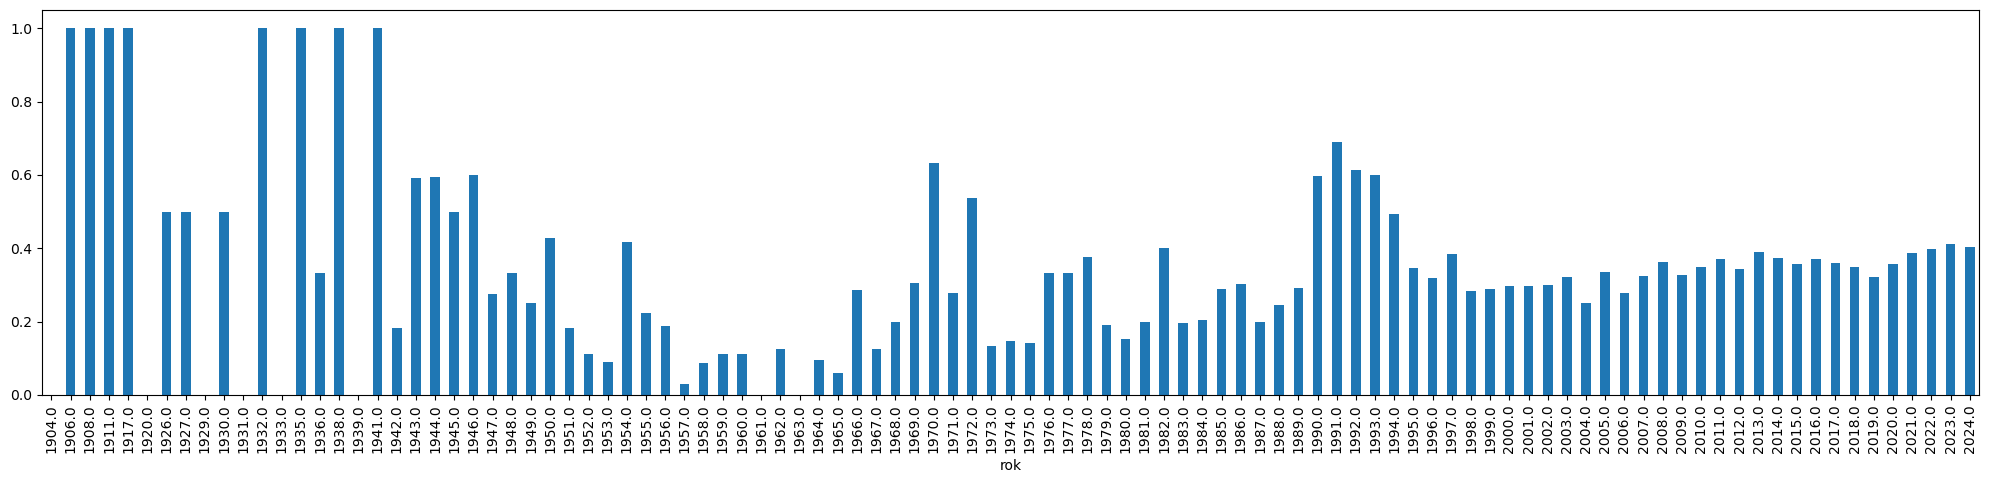

In [721]:
(cr1[cr1['vazba'] == 'brožovaná'].groupby('rok').size() / cr1[cr1['vazba'].isin(['pevná','brožovaná','oboje'])].groupby('rok').size()).plot.bar(figsize=(25,5))

In [ ]:
ceske_romany[ceske_romany['vazba'] == 'brožovaná'].groupby()

In [588]:
ceske_romany[ceske_romany['vydani'] == 1].groupby('rok').size().tail(50)

rok
1975.0      43
1976.0      34
1977.0      29
1978.0      39
1979.0      39
1980.0      29
1981.0      39
1982.0      47
1983.0      42
1984.0      50
1985.0      46
1986.0      43
1987.0      40
1988.0      51
1989.0      48
1990.0      82
1991.0     103
1992.0     161
1993.0     189
1994.0     136
1995.0     224
1996.0     248
1997.0     262
1998.0     257
1999.0     321
2000.0     409
2001.0     351
2002.0     428
2003.0     457
2004.0     500
2005.0     558
2006.0     566
2007.0     641
2008.0     650
2009.0     684
2010.0     755
2011.0     815
2012.0     810
2013.0     785
2014.0     833
2015.0     895
2016.0    1021
2017.0     979
2018.0     969
2019.0    1027
2020.0    1026
2021.0    1164
2022.0    1155
2023.0    1022
2024.0     577
dtype: int64

In [730]:
ceske_romany[ceske_romany['rok'] == 2024]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20223473733,221124s2024 xr a e 000 f cze,[978-80-11-02557-1],None,[(brožováno)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-31, (0:82-31)]","[aut, pbl]",None,"[Ludvík, Ludvík]",None,None,"Moje bývalá, budoucí, nastávající minulost /",[Ludvík Ludvík],None,None,None,[1. vydání],None,None,None,None,None,None,None,[V Brně :],"[nákladem autora,]",[2024],[1],[295 stran :],[ilustrace ;],[21 cm],None,None,None,None,None,[Pro čtenáře od 18 let],None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,[Ludvík Ludvík],None,nam a22 i 4500,2024.0,"Moje bývalá, budoucí, nastávající minulost",5,295.0,NaN,1.0,brožovaná,221124
nkc20233524909,240130s2024 xr a d 000 j cze,[978-80-242-9323-3],None,[(vázáno)],None,None,None,None,821.162.3-3,"[Česká próza, Literatura pro děti a mládež (beletrie)]","[821.162.3-32, 82-93-053.67, 82-93-053.6, 821-93-053.67, 821-93, (437.3), (0:82-32), (082.21)]",[aut],[xx0220156],"[Merglová, Michaela,]",[1990-],None,Za pět minut zvoní /,"[Michaela Merglová, Eva Maříková, Eva Pospíšilová a Klára Pospíšilová, Aleš Novotný, Jana Pavloušková, Karolína Skácelová, Michaela Červenková, Lenka Poláčková, Zuzana Žáčková, Kateřina Šardická, ...",None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Euromedia Group,]",[2024],[1],[253 stran :],[barevné ilustrace ;],[20 cm],[Yoli],None,[Podnázev v tiráži: antologie českých young adult povídek],[Sbírka příběhů pro mládež ze školních lavic. Několik známých českých autorů a autorek vám připomene radosti i strasti povinné školní docházky.],"[S hrdiny povídek odhalíte tajemnou šifru načmáranou na staré školní lavici, seberete odvahu a vzepřete se školním pravidlům, navážete jedinečná přátelství a prožijete stejně nezapomenutelnou lásk...",[Pro čtenáře od 13 let],None,[21. století],"[česká povídka, literatura young adult, literatura pro mládež, Czech short stories, young adult literature, juvenile literature]",None,"[21. století, 21. století, 21. století, 21st century, 21st century, 21st century]","[None, Česko, Česko, None, Czechia, Czechia]",None,None,"[české povídky, antologie, literatura young adult, publikace pro mládež, Czech short stories, anthology, young adult literature, juvenile literature]","[aut, aut, aut, aut, aut, aut, aut, aut, aut, aut, aut, aut]","[xx0313331, mzk2016898135, xx0256026, xx0241674, xx0276229, xx0267899, xx0192286, jo20221150966, xx0311477, xx0235576, xx0234171, xx0253640]","[Maříková, Eva, Pospíšilová, Eva, Pospíšilová, Klára,, Novotný, Aleš,, Pavloušková, Jana,, Skácelová, Karolína,, Červenková, Michaela,, Poláčková, Lenka, Žáčková, Zuzana,, Šardická, Kateřina,, Nov...","[None, None, 1990-, 1990-, 1985-, 1996-, 1997-, None, 1994-, 1991-, 1998-, None]",None,None,None,None,[Yoli],None,None,nam a22 i 4500,2024.0,Za pět minut zvoní,4,253.0,NaN,1.0,pevná,240130
nkc20233529121,240523s2024 xr g 000 j cze,[978-80-207-2188-4],None,[(vázáno)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-32, (0:82-32)]",[aut],[jk01061137],"[Kohout, Pavel,]",[1928-],None,Taková láska :,[Pavel Kohout],None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Odeon,]",[2024],[1],[214 stran ;],None,[21 cm],None,None,None,"[Soubor příběhů, které se mohly stát, dějí a některé se možná budou dít, jak napovídá podtitul knihy význačného českého autora.]","[Pro spisovatele a dramatika Pavla Kohouta psát znamená žít. A tak celý život střádá, promýšlí, přetv

<Axes: xlabel='rok'>

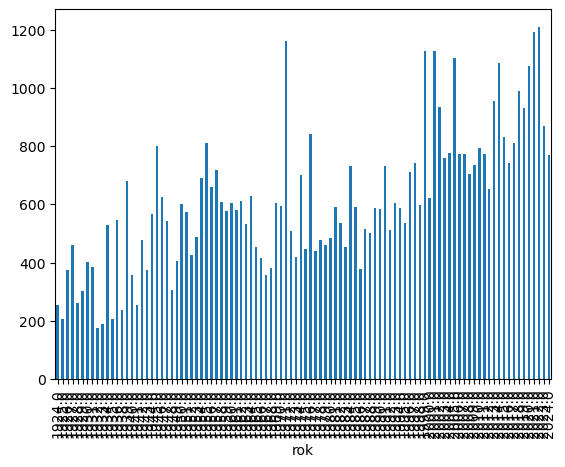

In [608]:
ceske_romany[ceske_romany['vydani'] == 1].groupby('rok')['stran'].max().tail(100).plot.bar()

<Axes: xlabel='rok'>

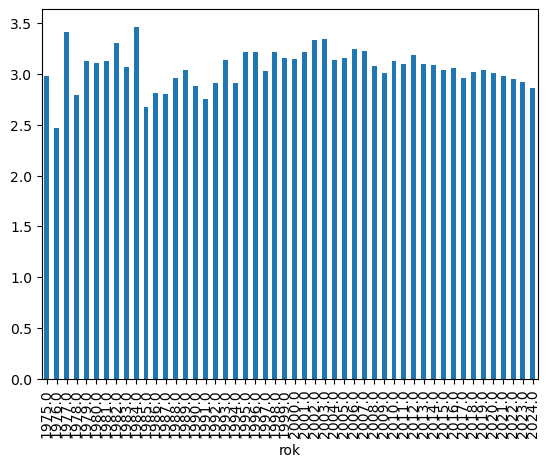

In [590]:
ceske_romany.groupby('rok')['slov_v_nazvu'].mean().tail(50).plot.bar()

In [591]:
ceske_romany.sample(20)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ck8904529,890814s1989 xr a e 000 f cze,[80-7034-004-5],"[Kčs 20,00]",[(váz.) :],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-31, (0:82-311.6)]",[aut],[jk01102694],"[Rosenbaum, Zdeněk,]",[1945-],None,Stát jako strom /,[Zdeněk Rosenbaum ; [il. a vazba Ervín Urban ; graf. úprava Magdalena Martínková]],None,None,None,[1. vyd.],None,[Ostrava :],"[Profil,]",[1989],[(Čes. Těšín :],[Tisk 3)],None,None,None,None,None,[201 s. :],[il. ;],[21 cm],None,None,"[15000 výt., Frontispis]",None,None,None,None,None,None,None,None,None,None,None,"[české romány, historické romány]",[ill],[jn20000710642],"[Urban, Ervín,]",[1931-1997],None,None,None,None,None,None,None,nam a22 4500,1989.0,Stát jako strom,3,201.0,20.0,1.0,pevná,890814
nkc20091961360,090601s2009 xr g 000 f cze,[978-80-204-2068-8],None,[(brož.)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[jk01073155],"[Makovička, Drahoslav,]",[1927-2018],None,"Anděl s ďáblem v těle, aneb, Velká dámská koalice /","[Drahoslav Makovička, Václav Matějka]",None,None,"[Anděl s ďáblem v těle, Velká dámská koalice]",[Vyd. 1.],None,[Praha :],"[Mladá fronta,]",[2009],None,None,None,None,None,None,None,[180 s. ;],None,[17 cm],[MF plus ;],[5],[Kniha podle klasického filmu],None,None,None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",[aut],[jk01080668],"[Matějka, Václav,]",[1937-],None,None,None,None,[MF plus],None,None,nam a22 a 4500,2009.0,"Anděl s ďáblem v těle, aneb, Velká dámská koalice",9,180.0,NaN,1.0,brožovaná,090601
nkc20112223586,110902s2011 xr a e 000 f cze,[978-80-260-0505-6],None,[(váz.)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-34, (437.314), (0:82-34)]","[aut, ill]",[hka0076000],"[Stejskal, Jan,]",[1938-2022],None,Pověsti a příběhy staré Chrudimě /,[Jan Stejskal],None,None,None,[1. vyd.],None,[Chrudim :],"[Galerie Art,]",[2011],None,None,None,None,None,None,None,[181 s. :],[il. (některé barev.) ;],[22 cm],None,None,None,None,None,None,None,None,None,None,None,None,"[Chrudim (Česko), Chrudim (Czechia)]",None,"[české pověsti, Czech legends]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,2011.0,Pověsti a příběhy staré Chrudimě,5,181.0,NaN,1.0,pevná,110902
nkc20142568212,140221s2013 xr g 000 j cze,[978-80-263-0295-7],None,[(brož.)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-32, (0:82-322.4)]",[aut],[ola2012679273],"[Kindl, František]",None,None,"Já, celkem hbitý boxovací pytel /",[František Kindl],None,None,None,[V Tribunu EU vyd. 1.],None,[Brno :],"[Tribun EU,]",[2013],None,None,None,None,None,None,None,[161 s. ;],None,[21 cm],[Knihovnicka.cz],None,None,None,None,None,None,None,None,None,None,None,None,None,"[české povídky, detektivní povídky, Czech short stories, detective short stories]",None,None,None,None,None,None,None,None,[Knihovnicka.cz],None,None,nam a22 a 4500,2013.0,"Já, celkem hbitý boxovací pytel",5,161.0,NaN,1.0,brožovaná,140221
nkc20203261385,201027s2020 xr g 000 f cze,[978-80-243-9447-3],None,[(vázáno)],None,None,None,None,821.162.3-3,[Česká próza],"[821.162.3-31, (0:82-311.6), (0:82-312.4)]",[aut],[xx0004129],"[Vondruška, Vlastimil,]",[1955-],None,Manželské zrcadlo /,[Vlastimil Vondruška],None,None,None,[Vydání první],None,None,None,None,None,None,None,[Brno :],"[MOBA,]",[2020],[1],[220 stran ;],None,[21 cm],[Letopisy královské komory ;],[XIV],None,"[Příběh ze série historických detektivních případů ze 16. století, které řeší královský písař Jiří Adam

<Axes: xlabel='rok'>

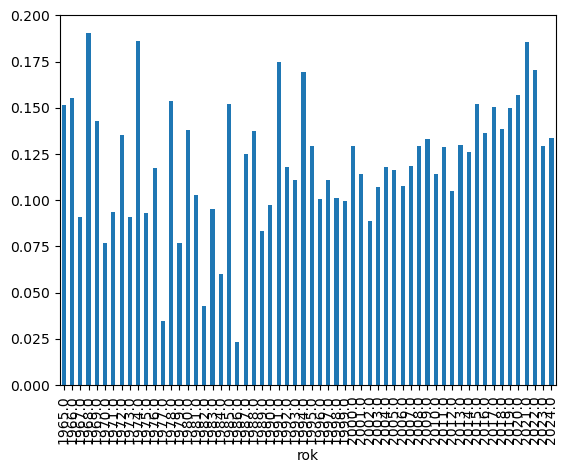

In [592]:
(ceske_romany[(ceske_romany['slov_v_nazvu'] == 1)].groupby('rok').size() / ceske_romany.groupby('rok').size()).tail(60).plot.bar()

In [593]:
pd.set_option('display.max_colwidth', 200)

In [594]:
ceske_romany[['rok','100_a','titul','slov_v_nazvu']].sort_values(by='slov_v_nazvu',ascending=False).head(50)

,rok,100_a,titul,slov_v_nazvu
001,,,,
bk196701838,1967.0,"[Vyskočil, Ivan,]","Tohle se jmenuje Malé hry, kde hláska há ve slově hry je neznělá, takže se tento název vyslovuje a taky znamená Maléry",22
nkc20193161463,2019.0,"[Hladký, Marek,]","Halóóó, tady Lucifa!, aneb, Fantastické dobrodružství Lucify a Dominika o tom, co je silnější než smrt a mocnější než čas",20
bk196704458,1967.0,"[Jírek, Bohumil,]",O hodně tlusté čáře redisovým perem číslo tři a jiná pohádková vyprávění pro 3. a a 4. b,18
nkc20071727351,2007.0,"[Dobner, Libor,]","Bořek, kluk ze znaku a dva tucty nejstarších pověstí a příběhů od Slané vody věnovaných dětem a mládeži",18
cpk20011004879,2001.0,"[Puluh-Pilstein, Jiří,]","Hádala se duše s pérem, aneb, Malá encyklopedie náboženství a erotiky, nebo taky, Sex and God and rock'n'roll",18
nkc20162825571,2016.0,"[Suček, Pavel,]","Povídání o důlních skřítcích Jakubovi, Janovi a Aloisovi z jižních Čech ze zlatonosné oblasti mezi Kasejovicemi a Bělčicemi",18
nkc20081811246,2008.0,"[Peroutková-Šafránková, Soňa,]","Je pro mě láska, která už zůstane?, aneb, K jakému poznání jsem došla díky svým prožitým vztahům",17
nkc20223390162,2021.0,"[Chlud, Jaroslav,]",Vyprávěnky pro Klárku a jiné slopenské příběhy a pověsti z kraje Vizovických hor a úbočí Bílých Karpat,17
cpk19960150238,1995.0,None,Příběhy vyprávěné při setkání spolužáků v sobotu dne 16.9.1995 v Třebíčské ulici č. 40 ve Velkém Meziříčí,17


<Axes: xlabel='rok'>

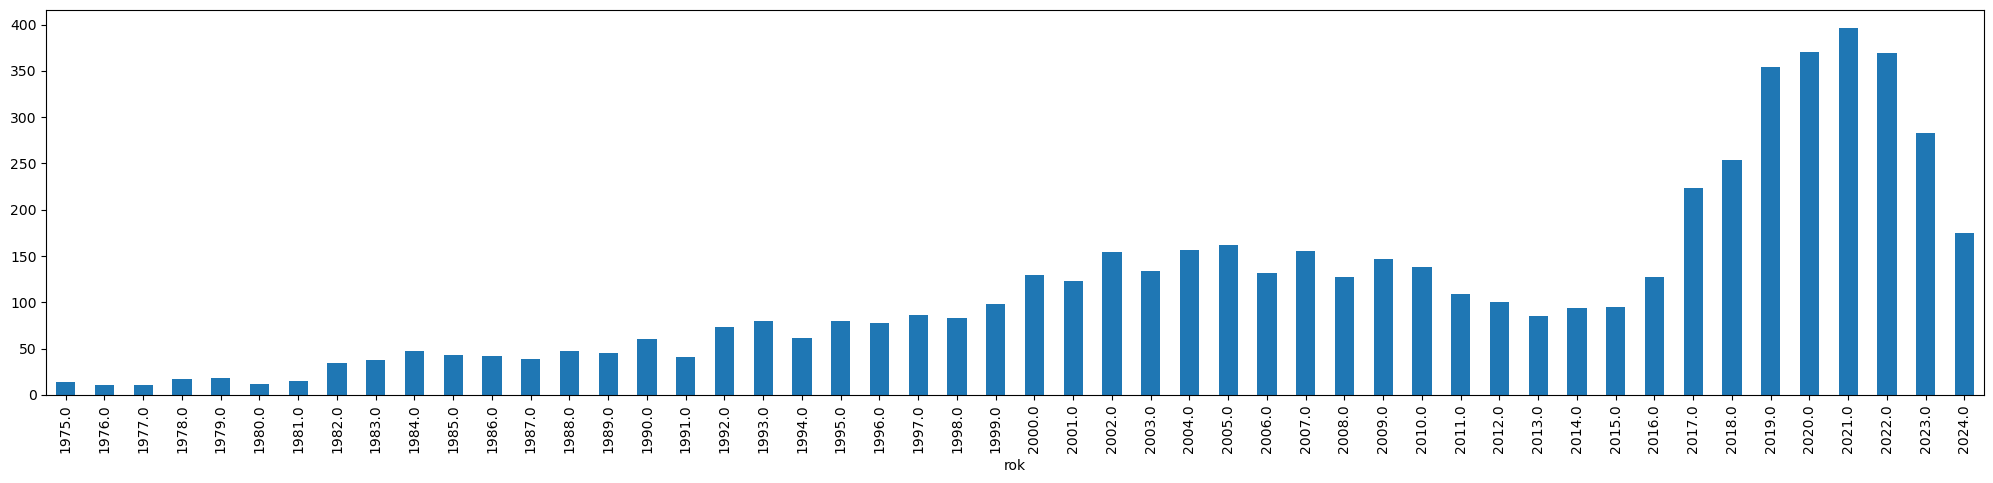

In [595]:
ceske_romany[ceske_romany['cena'].notnull()].groupby('rok').size().tail(50).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

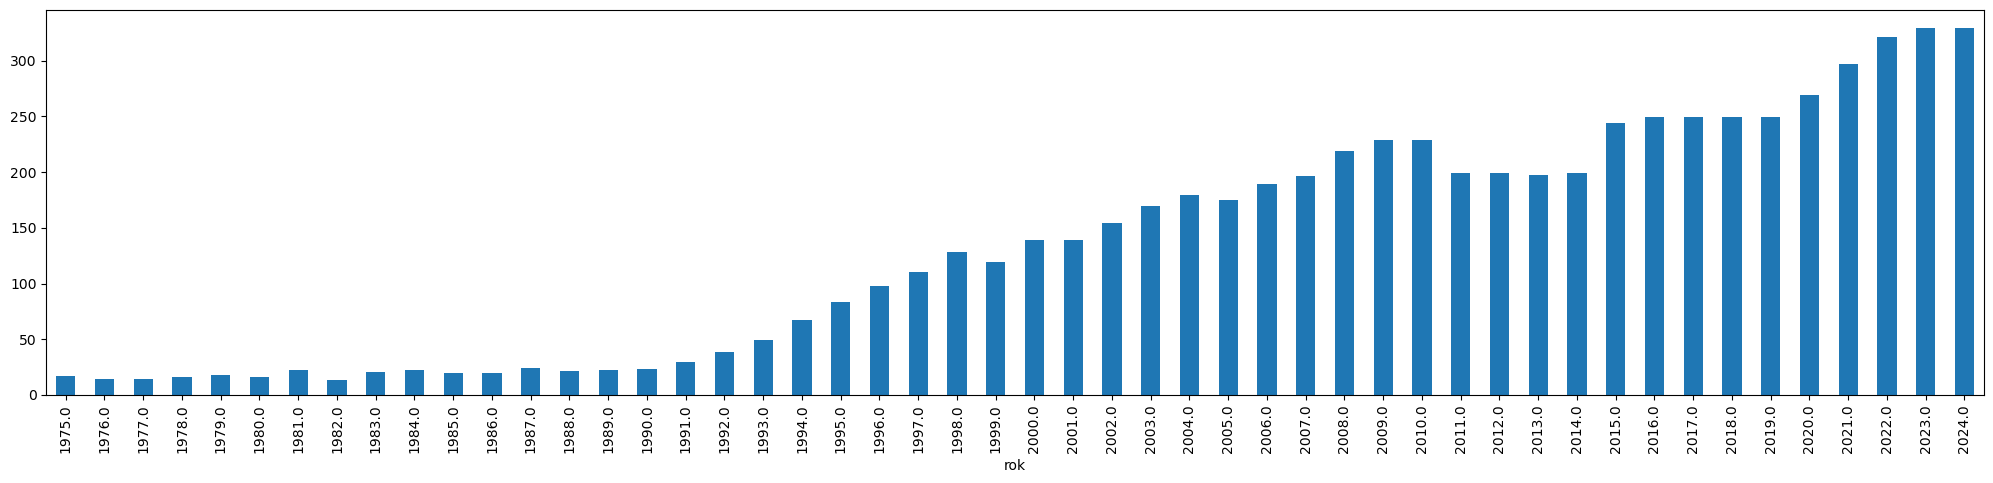

In [596]:
ceske_romany.groupby('rok')['cena'].median().tail(50).plot.bar(figsize=(25,5))

In [597]:
ceske_romany.groupby('rok')['cena'].median().tail(50)

rok
1975.0     17.0
1976.0     14.0
1977.0     14.0
1978.0     16.0
1979.0     17.5
1980.0     16.0
1981.0     22.0
1982.0     13.0
1983.0     20.5
1984.0     22.0
1985.0     20.0
1986.0     19.5
1987.0     24.0
1988.0     21.5
1989.0     22.0
1990.0     23.0
1991.0     30.0
1992.0     39.0
1993.0     49.0
1994.0     67.0
1995.0     83.0
1996.0     98.0
1997.0    110.0
1998.0    128.0
1999.0    119.0
2000.0    139.0
2001.0    139.0
2002.0    154.0
2003.0    169.5
2004.0    179.0
2005.0    174.5
2006.0    189.5
2007.0    196.5
2008.0    219.0
2009.0    229.0
2010.0    229.0
2011.0    199.0
2012.0    199.0
2013.0    197.0
2014.0    199.0
2015.0    244.0
2016.0    249.0
2017.0    249.0
2018.0    249.0
2019.0    249.0
2020.0    269.0
2021.0    297.0
2022.0    321.0
2023.0    329.0
2024.0    329.0
Name: cena, dtype: float64

In [598]:
ceske_romany[ceske_romany['rok'] == 2024][['titul','100_a']].sample(50)

,titul,100_a
001,,
nkc20243599075,Srdce v plamenech,"[Jones, Casey,]"
nkc20233574975,Planetky,"[Lundiaková, Hana,]"
nkc20243628755,Elbe,"[Palata, Luboš,]"
nkc20243603096,Pěkná snůška,"[Flaška, Jan,]"
nkc20243582831,Sólo pro motýly,"[Jahelková, Petra,]"
nkc20243612945,Čtveřice trampských pohádek,"[Bláha, Josef,]"
nkc20243599666,Kníže Štilfríd a orlice,"[Vítová, Jitka,]"
nkc20243626208,Temnoty hlubin,"[Ševčíková, Kateřina,]"
nkc20243595932,Třetí dcera,"[Sold, Leandra,]"


<Axes: xlabel='rok'>

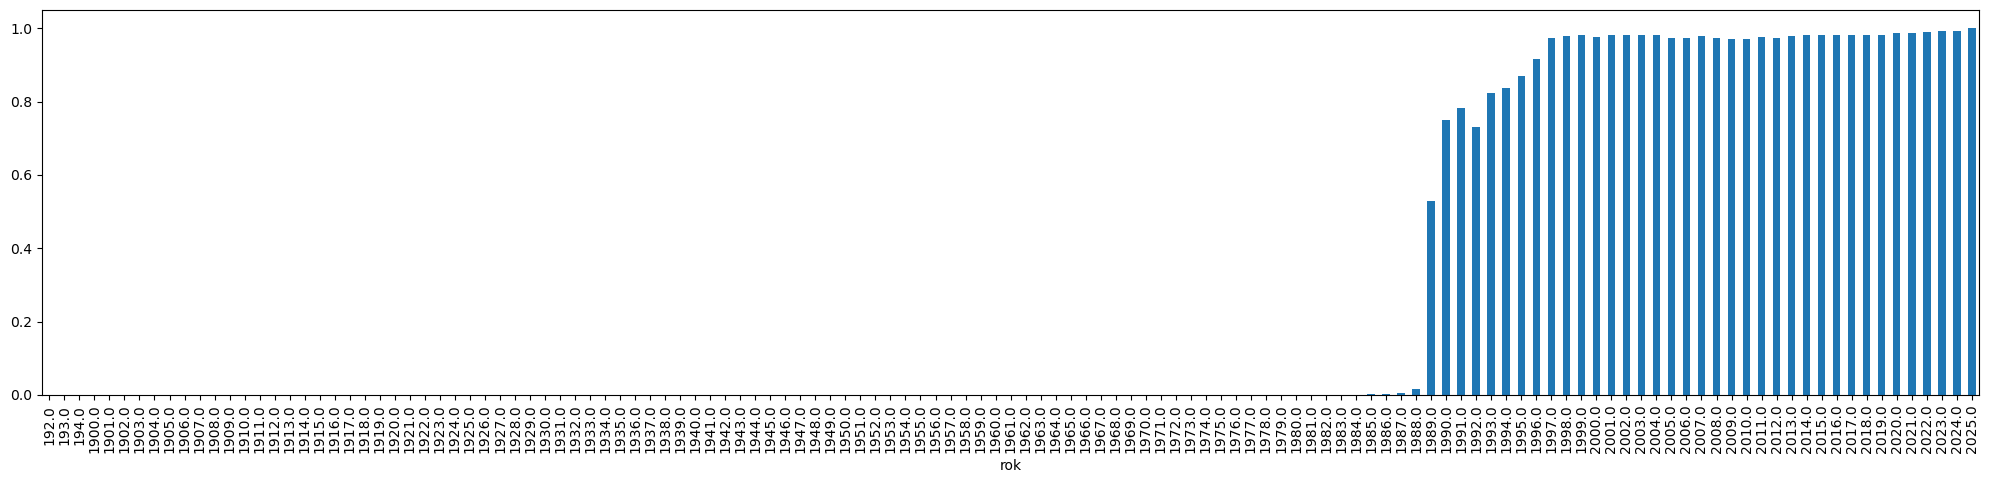

In [600]:
(df[df['020_a'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [601]:
df[(df['020_a'].isnull()) & (df['rok'] > 2002)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpe20031240927,030305s2003 xr s ||| | cze,None,None,None,"[cze, ger, eng]",None,[0],None,[902],[Archeologie],"[902:904, 902.2, (437.319), (0.034.4)]",None,None,None,None,None,Archeologické výzkumy v regionu Český Krumlov,None,None,None,None,None,None,[Český Krumlov :],"[Oficiální informační systém regionu Český Krumlov,]",[2003],None,None,None,None,None,None,None,[1 elektronický optický disk (CD-R) :],[barev. ;],[12 cm],None,None,"[Vytvořeno za finanční podpory Ministerstva kultury České republiky, Verze též v němčině a angličtině, Název z úvodní obrazovky, Některé soubory dostupné též na Internetu. Adresa 29.5.2003: http:/...","[Obsahuje historii města, regionu, zámku i středověkého hradu Český Krumlov (soubory htm, obrázky, videosekvence, mapy)]",None,None,None,None,[archeologické výzkumy],None,None,[Česko],[Český Krumlov (Česko)],None,[CD-ROM],None,None,None,None,[cph],None,[Sdružení oficiálního informačního systému Český Krumlov],None,None,None,None,nam a22 a 4500,2003.0,Archeologické výzkumy v regionu Český Kruml,6,1.0,NaN,NaN,NaN,030305
cpe20031247639,030725s2003 xr a es 100 0 cze,None,None,None,[cze],None,[0],None,"[63, 33]","[Zemědělství a příbuzné oblasti vědy a techniky, Ekonomie]","[63, 338.43.01, 332.055.2, 005:[007+004], 303.725.36, (062.534), (0.034.4)]",None,None,None,None,None,Sborník příspěvků ze semináře posluchačů doktorských studijních programů,None,None,None,"[Doktorandský seminář 2003, Sborník příspěvků z doktorandského semináře]",None,None,[Praha :],"[Česká zemědělská univerzita, Provozně ekonomická fakulta,]",[2003],None,None,None,None,None,None,None,[1 elektronický optický disk (CD-R) :],[barev. ;],[8 cm +],None,None,"[Název na úvodní obrazovce: Doktorandský seminář 2003, Název z tištěné brožury]","[CD-R obsahuje úplné texty příspěvků; v tištěné brožuře je u každého příspěvku pouze jméno, název, souhrn a klíčová slova v češtině a angličtině]",None,None,None,None,"[zemědělství, ekonomika zemědělství, regionální rozvoj, informační management, systémové inženýrství, agriculture, economics of agriculture, regional development, information resources management,...",None,None,None,None,None,"[sborníky konferencí, CD-ROM, proceedings of conferences]",None,None,None,None,None,[kn20010725055],[Česká zemědělská univerzita v Praze.],[Provozně ekonomická fakulta],None,None,None,cam a22 a 4500,2003.0,Sborník příspěvků ze semináře posluchačů doktorských studijních progra,8,1.0,NaN,NaN,NaN,030725
cpe20031248832,030507s2003 xr s cze,None,None,None,"[cze, eng, ger, fre, ita]",None,[0],None,[26],[Judaismus],"[26-523.4-525.4/.7, (083.824), (0.034.4)]",None,None,None,None,None,Synagogální textilie,[[odpovědný redaktor] Dana Veselská],None,None,"[Paramenti sinagogali, Synagogue Textile, Textiles de synagogue, Synagogale Textilien]",None,None,[Praha :],"[Židovské muzeum v Praze,]",[c2003],None,None,None,None,None,None,None,[1 elektronický optický disk (CD-ROM) :],[barev. ;],[12 cm],None,None,"[Verze v češtině, angličtině, němčině, francouzštině a italštině, Název z disku, Číslo na disku a na hřbetu pouzdra: ŽMP003]","[185 synagogálních textilií z unikátní výstavy v prostorách Pražského hradu (březen-červen 2003). Možnosti vyhledání a seřazení předmětů podle ikonografických motivů, materiálových či technologick...",None,None,None,[16.-20. století],"[synagogální textilie, synagogue textiles]",None,"[16.-20. století, 16th-20th centuries]","[Česko, Czechia]",None,None,"[katalogy výstav, CD-ROM, exhibition catalogs]",[edt

In [602]:
df[~((df['655_a'].astype(str).str.contains('časopisy',na=False)) & (df['008'].str[6] == 'c'))]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,titul,slov_v_nazvu,stran,cena,vydani,vazba,zmeneno
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68868,010202s2000 xr a 000 0 cze d,[80-238-3703-6],None,None,None,None,None,None,None,None,"[36, 577.3, 504, 55, 577.4, 615.849.2]",None,None,None,None,None,Principy a praxe radiační ochrany /,[kolektiv autorů ; editor Vladislav Klener],None,None,None,[[1. vyd.]],None,[Praha :],"[Státní úřad pro jadernou bezpečnost,]",[2000],None,None,None,None,None,None,None,[619 s. :],[il.],None,None,None,[Vydal Azin CZ pro Státní úřad pro jadernou bezpečnost v Praze],None,None,None,None,None,"[RADIAČNÍ OCHRANA, RADIAČNÍ OCHRANA /záření/, RADIAČNÍ ÚČINKY /záření/, RADIOAKTIVNÍ ODPAD, RADIOAKTIVNÍ ZNEČIŠŤUJÍCÍ LÁTKY, ZÁŘENÍ IONIZUJÍCÍ, životní prostředí, aplikovaná geofyzika]",None,None,None,[zeměkoule],None,"[příručky, texty]",[edt],[nlk19990073367],"[Klener, Vladislav,]",[1927-],None,None,None,None,None,[Azin CZ],None,nam a22 a 4500,2000.0,Principy a praxe radiační ochrany,5,619.0,NaN,1.0,NaN,010202
angl01291,930610s1948 xr e d 00| 0 cze,None,None,[(Váz.)],"[cze, eng]",None,[1],None,"[796, 81]","[Sport. Hry. Tělesná cvičení, Lingvistika. Jazyky]","[796.034.2, 796/799, 811.162.3, 811.111, 81'373.46, (038)81]",[com],None,"[Prokeš, Miroslav]",None,None,Stručný česko-anglický a anglicko-český slovník tělocvičných a sportovních výrazů =,"[sestavili Miroslav Prokeš, Jarmila Prokšová-Evaldová]",None,None,[Concise Czech-English and English-Czech dictionary of gymnastic and sporting terms],None,None,[[Praha] :],"[Min. školství a osvěty,]",[1948],None,None,None,None,None,None,None,[168 s. ;],None,[8°],[Knihovna tělesné výchovy MŠO ;],[8],None,None,None,None,None,None,"[tělovýchova, sport, čeština, angličtina, oborová terminologie]",None,None,None,None,None,[dvojjazyčné překladové slovníky],[com],[jk01101346],"[Prokšová-Ewaldová, Jarmila,]",[1900-1989],None,None,None,None,[Knihovna tělesné výchovy MŠO],None,None,nam a22 4500,1948.0,Stručný česko-anglický a anglicko-český slovník tělocvičných a sportovních výrazů,9,168.0,NaN,NaN,pevná,930610
angl01627a,931001s1991 xr 000 0 cze,None,None,[(Brož.)],"[cze, eng]",None,[0],None,None,None,[801.32],[aut],None,"[Mulač, Viktor]",None,None,Česko-anglický slovník ;,[[zpracoval Viktor Mulač a kolektiv]],None,None,"[Czech English dictionary, English Czech dictionary, Anglicko-český slovník, Angličtina expres - dictionary]",None,None,[[Praha] :],"[BonArt,]",[1991],None,None,None,None,None,None,None,[161; 185 s. ;],None,[15 cm],None,None,[Anglicko-český slovník tištěn zvratmo],None,None,None,None,None,[Angličtina-čeština-slovníky],None,None,None,None,"[slovníky anglicko-české, slovníky česko-anglické, Angličtina, Čeština]",None,None,None,None,None,None,None,None,None,None,None,"[Angličtina - čeština - slovníky, Čeština - angličtina - slovníky]",nam a22 a 4500,1991.0,Česko-anglický slovník,2,185.0,NaN,NaN,brožovaná,931001
bk190000512,980311s1961 xr af e | 000 0 cze,None,None,[(Brožováno)],None,None,None,None,[614],[Veřejné zdraví a hygiena],"[614.2:725.511, (437.319), (082)]",None,None,None,None,None,50 let písecké nemocnice,None,None,None,[50 let nemocnice v Písku],None,None,None,None,None,None,None,None,[Písek :],"[OÚNZ,]",[1961],[1],"[45 stran, 20 nečíslovaných stran obrazových příloh]",[ilustrace ;],[21 cm],None,None,[750 výtisků],None,None,None,None,None,[nemocnice],None,[20. století],[Česko],[Písek (Česko)],None,[sborníky],None,None,None,None,None,None,None,None,None,None,None,nam a22 1i 4500,1961.0,50 let písecké nemocni,4,45.0,NaN,NaN,brožovaná,980311
bk190900003,981116s1957 xr a 000 cze,None,"[Kčs 6,90